# Material Handling

There are 3 groups of material in Femag: iron, magnets and conductors.

## Iron Material

Iron is used for the lamination of stator and rotor. Its properties are included in MC/MCV files. This is how MCV files can be read:

In [1]:
import femagtools.mcv

In [2]:
mcvreader = femagtools.mcv.Reader()
mcvreader.readMcv('M270-35A.MC')

In [3]:
mcvreader.get_results()

{'name': 'M270-35A',
 'desc': 'Magnetic Curve                          ',
 'cversion': 0,
 'ctype': 1,
 'recalc': 0,
 'remz': 0.0,
 'bsat': 0.0,
 'bref': 0.0,
 'fillfac': 1.0,
 'fo': 50.0,
 'Bo': 1.5,
 'ch': 0.0,
 'ch_freq': 1.0,
 'cw': 3.0,
 'cw_freq': 1.4500000476837158,
 'b_coeff': 1.850000023841858,
 'rho': 7.650000095367432,
 'fe_sat_mag': 2.1500000953674316,
 'curve': [{'hi': [0.0,
    10.0,
    20.0,
    30.0,
    40.0,
    50.0,
    60.0,
    70.0,
    80.0,
    90.0,
    100.0,
    200.0,
    300.0,
    400.0,
    500.0,
    600.0,
    700.0,
    800.0,
    900.0,
    1000.0,
    2000.0,
    3000.0,
    4000.0,
    5000.0,
    6000.0,
    7000.0,
    8000.0,
    9000.0,
    10000.0,
    20000.0,
    30000.0,
    40000.0,
    50000.0,
    60000.0,
    70000.0,
    80000.0,
    90000.0,
    100000.0,
    200000.0,
    500000.0],
   'bi': [0.0,
    0.10174000263214111,
    0.2011370062828064,
    0.29615598917007446,
    0.38528698682785034,
    0.4676159918308258,
    0.54277598

Display the B(H) curve in a linear plot:

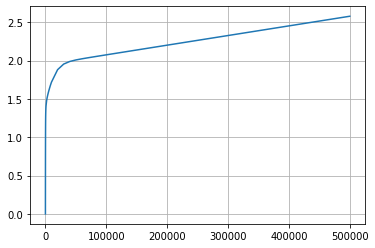

In [4]:
import matplotlib.pyplot as plt

plt.plot(mcvreader['curve'][0]['hi'], mcvreader['curve'][0]['bi'])
plt.grid()
plt.show()

or with the plot module:

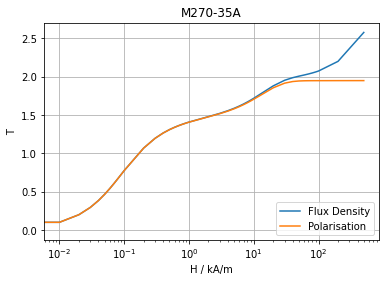

In [5]:
import femagtools.plot
femagtools.plot.mcv_hbj(mcvreader, log=True)
plt.show()

Display the relative permeability:

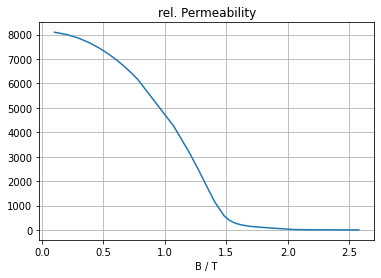

In [6]:
femagtools.plot.mcv_muer(mcvreader)
plt.show()

A new BH curve can be created from a dict:

In [7]:
mcvData = dict(curve=[ dict(
     bi=[0.0, 0.09, 0.179, 0.267, 0.358,
         0.45, 0.543, 0.6334, 0.727,
         0.819, 0.9142, 1.0142, 1.102,
         1.196, 1.314, 1.3845, 1.433,
         1.576, 1.677, 1.745, 1.787,
         1.81, 1.825, 1.836],
 
     hi=[0.0, 22.16, 31.07, 37.25, 43.174,
          49.54, 56.96, 66.11, 78.291,
          95, 120.64, 164.6, 259.36,
          565.86, 1650.26, 3631.12, 5000, 10000,
          15000, 20000, 25000, 30000, 35000, 40000]
      )],
      ctype=femagtools.mcv.MAGCRV,
      name='m270-35a',
      desc=u"Demo Steel",
      ch=0.0,
      cw_freq=2.0,
      cw=1.68)

The MCV dict must contain a list of curves. If the material is soft iron this list has exactly one dict with the 2 lists of bi and hi. 

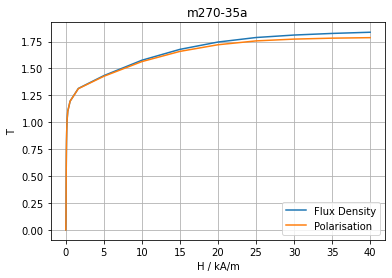

In [8]:
femagtools.plot.mcv_hbj(mcvData, log=False)
plt.show()

In [9]:
mcv = femagtools.mcv.MagnetizingCurve(mcvData)
mcv.writefile('m270-35a')

'm270-35a.MCV'

In [10]:
mcvreader.readMcv('m270-35a.MCV')

In [11]:
mcvreader['curve'][0]['bi']

[0.0,
 0.09000000357627869,
 0.17900000512599945,
 0.2669999897480011,
 0.3580000102519989,
 0.44999998807907104,
 0.5429999828338623,
 0.633400022983551,
 0.7269999980926514,
 0.8190000057220459,
 0.9142000079154968,
 1.01419997215271,
 1.1019999980926514,
 1.1959999799728394,
 1.3140000104904175,
 1.3845000267028809,
 1.4329999685287476,
 1.5759999752044678,
 1.6770000457763672,
 1.7450000047683716,
 1.7869999408721924,
 1.809999942779541,
 1.8250000476837158,
 1.8359999656677246]

Magnetic curve dicts can also be created from TKS files:

2022-08-23 14:47:21,616 TKS-M400-65A.txt Bmax 1.91
2022-08-23 14:47:21,619 Jordan loss coeffs [0.60174737 0.01767362 2.70411823 1.72805568 2.23143349]
2022-08-23 14:47:21,620 Steinmetz loss coeffs [2.85738168 1.40063212 1.66027616]


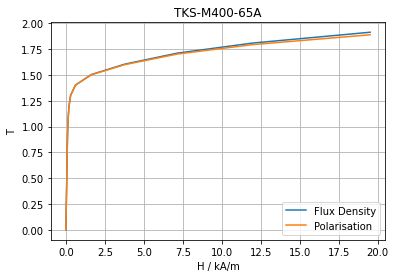

In [12]:
import femagtools.tks
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
tks = femagtools.tks.read('TKS-M400-65A.txt')
femagtools.plot.mcv_hbj(tks, log=False)
plt.show()

If the TKS file includes losses they are fitted with the Jordan approximation:

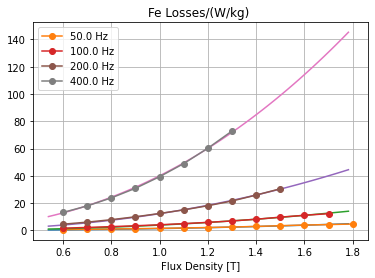

In [13]:
ch = tks['ch']
alpha = tks['ch_freq']
cw = tks['cw']
beta = tks['cw_freq']
gamma = tks['b_coeff']

femagtools.plot.felosses(tks['losses'], (ch, alpha, cw, beta, gamma), log=False)
plt.show()

In [14]:
tks['losses']

{'f': [50.0, 100.0, 200.0, 400.0],
 'B': [0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  0.9999999999999999,
  1.0999999999999999,
  1.1999999999999997,
  1.2999999999999998,
  1.4,
  1.4999999999999998,
  1.5999999999999996,
  1.6999999999999997,
  1.7999999999999998],
 'cw': 2.8573816821092546,
 'cw_freq': 1.4006321234719445,
 'b_coeff': 1.660276164271306,
 'Bo': 1.5,
 'fo': 50.0,
 'pfe': [[0.6184846623678998,
   0.7820909036227961,
   1.005609456949922,
   1.2364446193672063,
   1.4863831645663632,
   1.7645234720540768,
   2.088224179444146,
   2.4521188646457315,
   2.9017655916709155,
   3.434009600093662,
   3.903522218495639,
   4.252320254313521,
   4.6656123143839965],
  [1.6055181246032564,
   2.1465368942456373,
   2.749742857774846,
   3.380237407764824,
   4.115223454452131,
   4.926505300885987,
   5.88102783310848,
   6.919001346026851,
   8.146626903481913,
   9.704304197440532,
   11.070882741021764,
   12.24685805441727,
   None],
  [4.524686370787231,
   

## Magnet Material

Magnets can be defined by magnetizing curve or in the linear case which is used convienently by the remanence and the relative permeability: 

In [15]:
magnets = [dict(name='MX-333', remanenc=1.2, relperm=1.05)]

In cases where this not applicabble a magnetizing curve can be referenced:

In [16]:
magnets=[dict(name='BH53M', mcvkey='BH53M',
                     orient='mcartiso', rlen=1.0)]

The mcvkey can either reference a file or an entry in the magnetizing curve dict.